
# Projeto N2 – Bank Marketing Dataset  
## Análise Exploratória de Dados (EDA)  

Este notebook utiliza a base `bank_clean.csv` com as colunas já renomeadas e ajustadas.  
O objetivo é analisar fatores que influenciam a adesão de clientes a depósitos a prazo.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Configuração de gráficos
params = {'legend.fontsize': 'large',
          'figure.figsize': (12, 5),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'}
plt.rcParams.update(params)


## 1. Explorando o Dataset

**Dataset:** Bank Marketing Dataset.  
**Autor:** Janio Martinez Bachmann.  
**Fonte:** [Kaggle](https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset/data).

###1.1 Importando o dataset

In [ ]:
# Carregar base
df = pd.read_csv('/content/bank_clean.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.columns = [
    'idade',
    'trabalho',
    'estado_civil',
    'educacao', 'inadimplente',
    'saldo',
    'financiamento_imobiliario',
    'emprestimo_pessoal',
    'contato',
    'dia',
    'mes',
    'duracao_contato',
    'campanha',
    'dias_contatos',
    'contatos_anteriores',
    'resultado_campanha',
    'deposito'
    ]

df.head()

,idade,trabalho,estado_civil,educacao,inadimplente,saldo,financiamento_imobiliario,emprestimo_pessoal,contato,dia,mes,duracao_contato,campanha,dias_contatos,contatos_anteriores,resultado_campanha,deposito
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.drop(
    columns={
        'contato',
        'dia',
        'dias_contatos',
        'contatos_anteriores',
        'resultado_campanha'},
    inplace=True)
df.head()

,idade,trabalho,estado_civil,educacao,inadimplente,saldo,financiamento_imobiliario,emprestimo_pessoal,mes,duracao_contato,campanha,deposito
0,59,admin.,married,secondary,no,2343,yes,no,may,1042,1,yes
1,56,admin.,married,secondary,no,45,no,no,may,1467,1,yes
2,41,technician,married,secondary,no,1270,yes,no,may,1389,1,yes
3,55,services,married,secondary,no,2476,yes,no,may,579,1,yes
4,54,admin.,married,tertiary,no,184,no,no,may,673,2,yes


### 1.2 Informações básicas do dataset

In [ ]:
print(f'O dataset possui {df.shape[0]} exemplos/amostras/linhas e {df.shape[1]} atributos/variáveis/colunas.')

O dataset possui 10634 exemplos/amostras/linhas e 12 atributos/variáveis/colunas.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10634 entries, 0 to 10633
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   idade                      10634 non-null  int64 
 1   trabalho                   10634 non-null  object
 2   estado_civil               10634 non-null  object
 3   educacao                   10634 non-null  object
 4   inadimplente               10634 non-null  object
 5   saldo                      10634 non-null  int64 
 6   financiamento_imobiliario  10634 non-null  object
 7   emprestimo_pessoal         10634 non-null  object
 8   mes                        10634 non-null  object
 9   duracao_contato            10634 non-null  int64 
 10  campanha                   10634 non-null  int64 
 11  deposito                   10634 non-null  object
dtypes: int64(4), object(8)
memory usage: 997.1+ KB


### 1.3 Estatísitcas descritivas

In [ ]:
df.describe(include='all')

,idade,trabalho,estado_civil,educacao,inadimplente,saldo,financiamento_imobiliario,emprestimo_pessoal,mes,duracao_contato,campanha,deposito
count,10634.000000,10634,10634,10634,10634,10634.000000,10634,10634,10634,10634.000000,10634.000000,10634
unique,NaN,11,3,3,2,NaN,2,2,12,NaN,NaN,2
top,NaN,management,married,secondary,no,NaN,no,no,may,NaN,NaN,no
freq,NaN,2482,6041,5461,10475,NaN,5530,9202,2706,NaN,NaN,5613
mean,41.027083,NaN,NaN,NaN,NaN,1517.947339,NaN,NaN,NaN,373.298006,2.501411,NaN
std,11.739332,NaN,NaN,NaN,NaN,3224.425115,NaN,NaN,NaN,349.198795,2.632235,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,2.000000,1.000000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,119.000000,NaN,NaN,NaN,138.000000,1.000000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,542.000000,NaN,NaN,NaN,255.000000,2.000000,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1693.000000,NaN,NaN,NaN,500.000000,3.000000,NaN


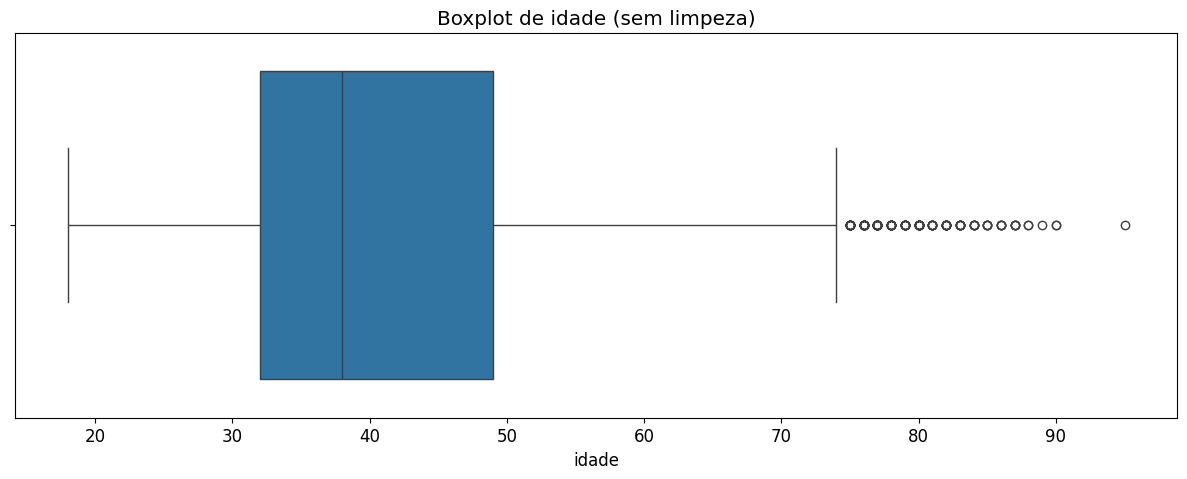

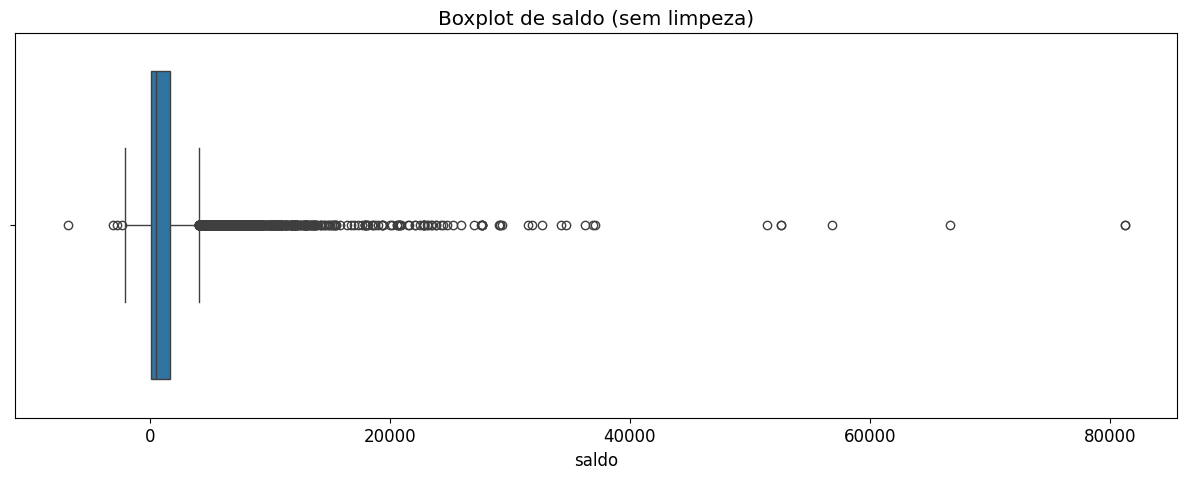

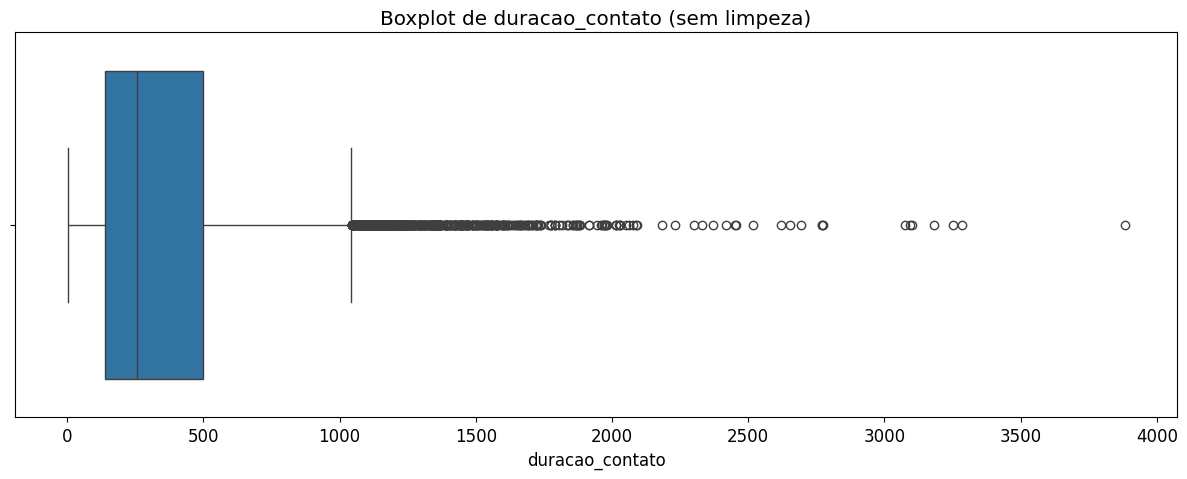

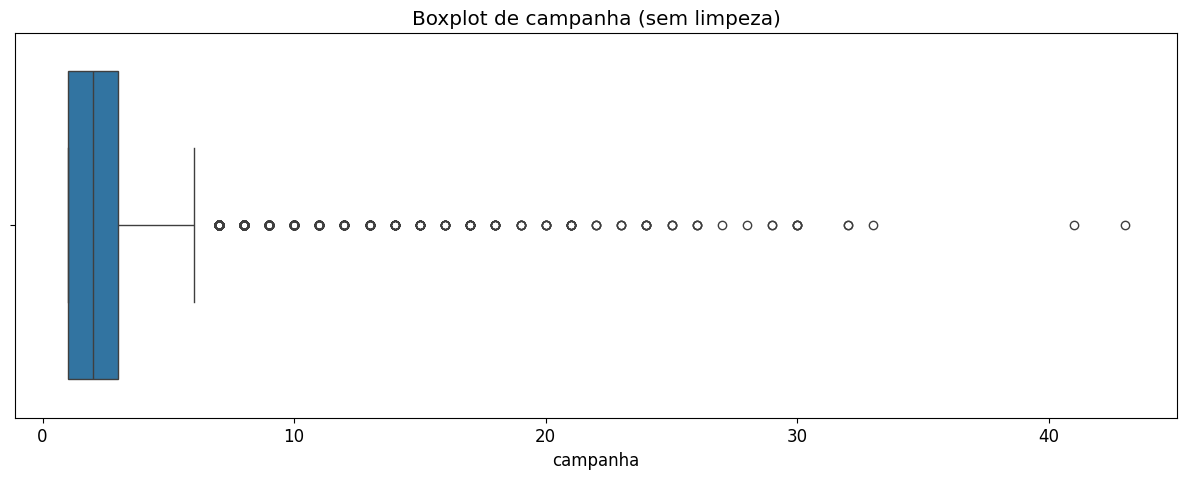

In [ ]:
numericas = ['idade', 'saldo', 'duracao_contato', 'campanha']
categoricas = ['trabalho', 'estado_civil', 'educacao', 'mes', 'inadimplente',
               'financiamento_imobiliario', 'emprestimo_pessoal', 'deposito']

for col in numericas:
  plt.figure(figsize=(15,5))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot de {col} (sem limpeza)')
  plt.show()

### 2. Limpeza dos dados

2.1 Remover Outliers (IQR)

In [ ]:
def limpar_outliers_iqr(df_in, cols_num):
    """Remove outliers por IQR (1.5*IQR) para as colunas numéricas informadas."""
    df_out = df_in.copy()
    for col in cols_num:
        s = df_out[col].dropna()
        if len(s) == 0:
            continue
        Q1, Q3 = s.quantile(0.25), s.quantile(0.75)
        IQR = Q3 - Q1
        low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
        df_out = df_out[(df_out[col] >= low) & (df_out[col] <= high)]
    return df_out

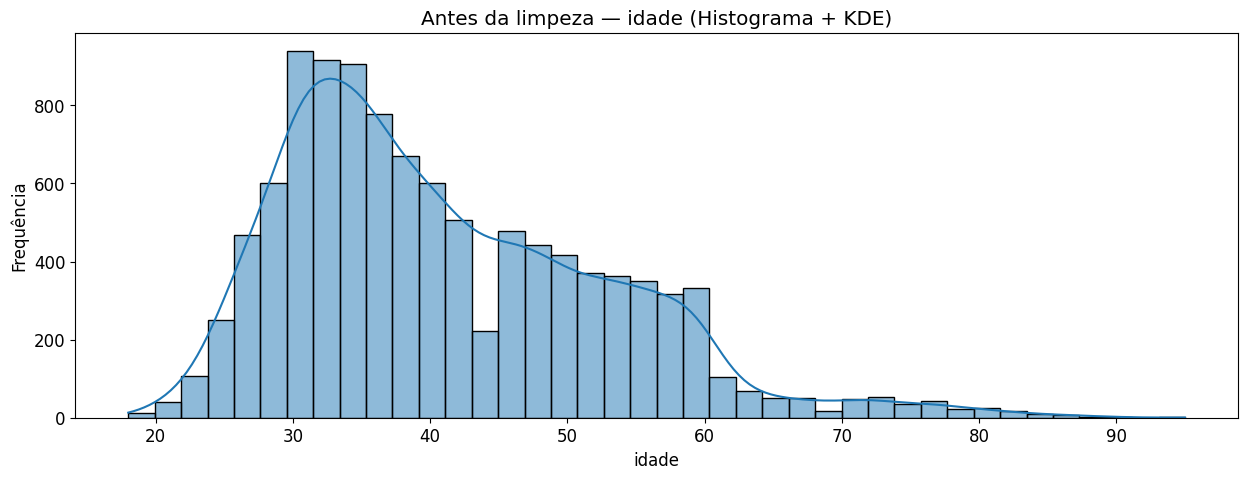

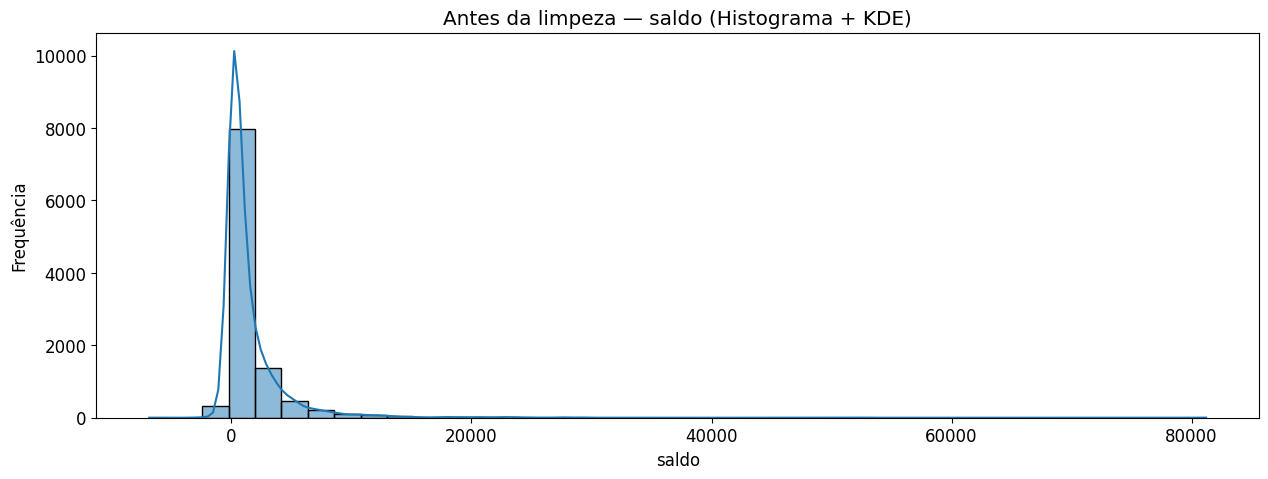

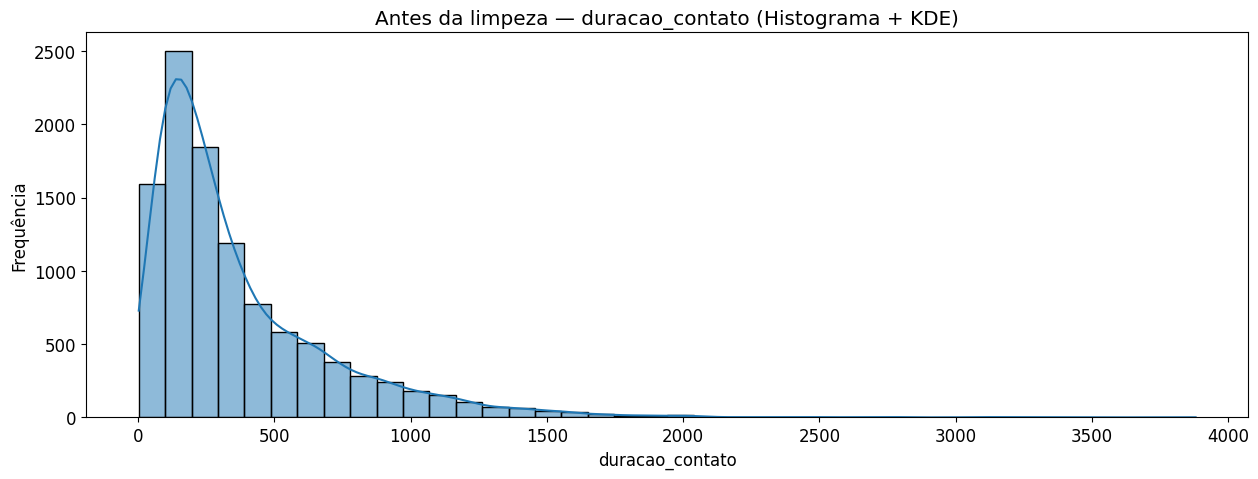

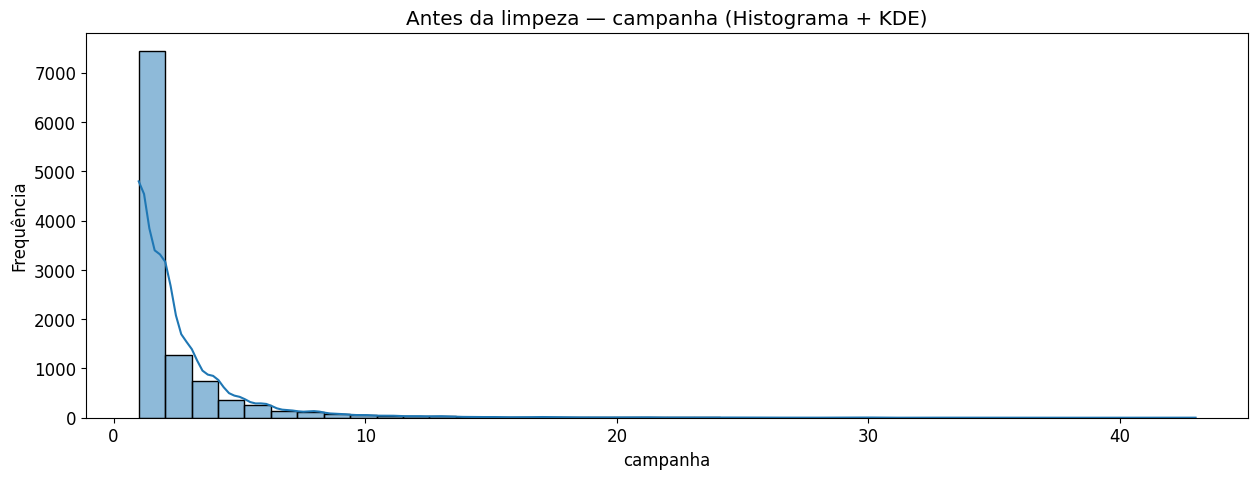

In [ ]:
def hist_kde_ecdf(df_in, col, titulo_prefixo=""):
    s = df_in[col].dropna()
    if len(s) == 0:
        print(f"(sem dados em {col})")
        return

for col in numericas:
    s = df[col].dropna()

    plt.figure(figsize=(15,5))
    sns.histplot(s, bins=40, kde=True)
    plt.title(f"Antes da limpeza — {col} (Histograma + KDE)")
    plt.xlabel(col); plt.ylabel("Frequência")
    plt.show()




In [ ]:
df_limpo = limpar_outliers_iqr(df, numericas)

print("Tamanho original:", len(df))
print("Após remover outliers:", len(df_limpo))


Tamanho original: 10634
Após remover outliers: 8460


In [ ]:
print("Estatísticas Descritivas - Variáveis Numéricas (ANTES DA LIMPEZA)\n")
estat = df[numericas].describe().T
estat["mediana"] = df[numericas].median()
display(estat.round(3))

Estatísticas Descritivas - Variáveis Numéricas (ANTES DA LIMPEZA)



,count,mean,std,min,25%,50%,75%,max,mediana
idade,10634.0,41.027,11.739,18.0,32.0,38.0,49.0,95.0,38.0
saldo,10634.0,1517.947,3224.425,-6847.0,119.0,542.0,1693.0,81204.0,542.0
duracao_contato,10634.0,373.298,349.199,2.0,138.0,255.0,500.0,3881.0,255.0
campanha,10634.0,2.501,2.632,1.0,1.0,2.0,3.0,43.0,2.0


In [ ]:
print("Estatísticas Descritivas - Variáveis Numéricas (APÓS LIMPEZA)\n")
estat = df_limpo[numericas].describe().T
estat["mediana"] = df_limpo[numericas].median()
display(estat.round(3))


Estatísticas Descritivas - Variáveis Numéricas (APÓS LIMPEZA)



,count,mean,std,min,25%,50%,75%,max,mediana
idade,8460.0,40.223,10.913,18.0,32.00,38.0,48.0,74.0,38.0
saldo,8460.0,792.303,980.422,-2049.0,92.75,431.0,1199.0,3975.0,431.0
duracao_contato,8460.0,313.073,234.835,2.0,136.00,242.0,430.0,1033.0,242.0
campanha,8460.0,2.020,1.264,1.0,1.00,2.0,3.0,6.0,2.0


***Interpretação***:

**Idade**:

Média: 40,2 anos; Mediana: 38 anos; Mín: 18 anos; Máx: 74 anos; Desvio-padrão: 10,9 anos.

**Saldo**:

Média: 792,3; Mediana: 431; Mín: -2.049; Máx: 3.975; Desvio-padrão: 980,4.

**Duração contato (segundos)**:

Média: 313 seg.; Mediana: 242 seg.; Mín: 2 seg.; Máx: 1.033 seg; Desvio-padrão: 234,8 seg..

**Campanha**:

Média: 2; Mediana: 2; Mín: 1; Máx: 6; Desvio-padrão: 1,3.

---

• A maior parte das pessoas que participaram da campanha realizada pelo banco estão entre 32 e 48 anos;

• Os dados possuem uma distribuição equilibrada, pois a média e a mediana possuem valores próximos;

• Após a limpeza dos daods, os extremos diminuem e dessa forma a distribuição fica mais estável.


In [ ]:
# Criar faixas etárias
bins = [17, 25, 35, 45, 55, 65, 120]
labels = ["18-25","26-35","36-45","46-55","56-65","65+"]
df_limpo['faixa_idade'] = pd.cut(df_limpo['idade'], bins=bins, labels=labels, right=True)

# Adicionar faixa_idade às categóricas
categoricas_com_idade = categoricas + ['faixa_idade']

print("\nFrequências - Variáveis Categóricas (APÓS LIMPEZA)\n")
for col in categoricas_com_idade:
    if col in df_limpo.columns:
        print(f"\n{col}:\n")
        print(df_limpo[col].value_counts(dropna=False))
        print("-"*40)


Frequências - Variáveis Categóricas (APÓS LIMPEZA)


trabalho:

trabalho
management       1944
blue-collar      1526
technician       1407
admin.           1082
services          726
retired           473
self-employed     300
unemployed        295
entrepreneur      252
student           248
housemaid         207
Name: count, dtype: int64
----------------------------------------

estado_civil:

estado_civil
married     4743
single      2739
divorced     978
Name: count, dtype: int64
----------------------------------------

educacao:

educacao
secondary    4444
tertiary     2903
primary      1113
Name: count, dtype: int64
----------------------------------------

mes:

mes
may    2263
jul    1103
aug    1094
jun     896
apr     717
nov     695
feb     612
oct     287
jan     273
sep     232
mar     213
dec      75
Name: count, dtype: int64
----------------------------------------

inadimplente:

inadimplente
no     8323
yes     137
Name: count, dtype: int64
---------------------------

2.2 Ajuste das variáveis

In [ ]:
def map_yes_no(series):
  return series.replace({'yes':1, 'no':0})

for col in ['deposito','inadimplente','financiamento_imobiliario','emprestimo_pessoal']:
    if col in df_limpo.columns and df_limpo[col].dtype == object:
        df_limpo[col] = map_yes_no(df_limpo[col].str.lower().str.strip())

df_limpo.head()

/tmp/ipython-input-870979619.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.replace({'yes':1, 'no':0})


,idade,trabalho,estado_civil,educacao,inadimplente,saldo,financiamento_imobiliario,emprestimo_pessoal,mes,duracao_contato,campanha,deposito,faixa_idade
3,55,services,married,secondary,0,2476,1,0,may,579,1,1,46-55
4,54,admin.,married,tertiary,0,184,0,0,may,673,2,1,46-55
5,42,management,single,tertiary,0,0,1,1,may,562,2,1,36-45
7,60,retired,divorced,secondary,0,545,1,0,may,1030,1,1,56-65
8,37,technician,married,secondary,0,1,1,0,may,608,1,1,36-45


In [ ]:
print(f"O dataset possui {df_limpo.shape[0]} linhas e {df_limpo.shape[1]} colunas.")
display(df_limpo.head())
display(df_limpo.describe(include='all'))

O dataset possui 8460 linhas e 13 colunas.


,idade,trabalho,estado_civil,educacao,inadimplente,saldo,financiamento_imobiliario,emprestimo_pessoal,mes,duracao_contato,campanha,deposito,faixa_idade
3,55,services,married,secondary,0,2476,1,0,may,579,1,1,46-55
4,54,admin.,married,tertiary,0,184,0,0,may,673,2,1,46-55
5,42,management,single,tertiary,0,0,1,1,may,562,2,1,36-45
7,60,retired,divorced,secondary,0,545,1,0,may,1030,1,1,56-65
8,37,technician,married,secondary,0,1,1,0,may,608,1,1,36-45


,idade,trabalho,estado_civil,educacao,inadimplente,saldo,financiamento_imobiliario,emprestimo_pessoal,mes,duracao_contato,campanha,deposito,faixa_idade
count,8460.000000,8460,8460,8460,8460.000000,8460.000000,8460.000000,8460.000000,8460,8460.000000,8460.000000,8460.000000,8460
unique,NaN,11,3,3,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,6
top,NaN,management,married,secondary,NaN,NaN,NaN,NaN,may,NaN,NaN,NaN,26-35
freq,NaN,1944,4743,4444,NaN,NaN,NaN,NaN,2263,NaN,NaN,NaN,3170
mean,40.222813,NaN,NaN,NaN,0.016194,792.302719,0.487943,0.139125,NaN,313.072813,2.019858,0.443735,NaN
std,10.913425,NaN,NaN,NaN,0.126228,980.421976,0.499884,0.346098,NaN,234.834746,1.264456,0.496854,NaN
min,18.000000,NaN,NaN,NaN,0.000000,-2049.000000,0.000000,0.000000,NaN,2.000000,1.000000,0.000000,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,92.750000,0.000000,0.000000,NaN,136.000000,1.000000,0.000000,NaN
50%,38.000000,NaN,NaN,NaN,0.000000,431.000000,0.000000,0.000000,NaN,242.000000,2.000000,0.000000,NaN
75%,48.000000,NaN,NaN,NaN,0.000000,1199.000000,1.000000,0.000000,NaN,430.000000,3.000000,1.000000,NaN


In [ ]:
estatisticas_columns = df_limpo[[
    'idade',
    'saldo',
    'duracao_contato',
    'campanha'
]].describe().T

print(estatisticas_columns)

                  count        mean         std     min     25%    50%  \
idade            8460.0   40.222813   10.913425    18.0   32.00   38.0   
saldo            8460.0  792.302719  980.421976 -2049.0   92.75  431.0   
duracao_contato  8460.0  313.072813  234.834746     2.0  136.00  242.0   
campanha         8460.0    2.019858    1.264456     1.0    1.00    2.0   

                    75%     max  
idade              48.0    74.0  
saldo            1199.0  3975.0  
duracao_contato   430.0  1033.0  
campanha            3.0     6.0  


## 3. Idade × Depósito

***Dúvidas quanto a análise de dados entre Idade dos clientes e a quantidade de depósito***

*   Qual a faixa etária com maior contribuição para os depósitos?
*   Qual a faixa mais conservadora, ou seja, que não realiza o depósito ou possuem pouca contribuição no depósito?
*   Quais são as faixas com mais propensão e menos propensão a aderir à campanha?
*   Entre os que mais depositam, qual é o perfil econômico deles, ou seja, quantidade de saldo, inadimplência, financiamento imobiliário ou empréstimo pessoal?
*   A idade das pessoas afetou a quantidade de contatos que receberam?
*   A escolaridade influencia a uma maior propensão de depósitos?

,deposito
faixa_idade,
18-25,69.44
26-35,45.05
36-45,37.61
46-55,39.28
56-65,52.43
65+,83.33


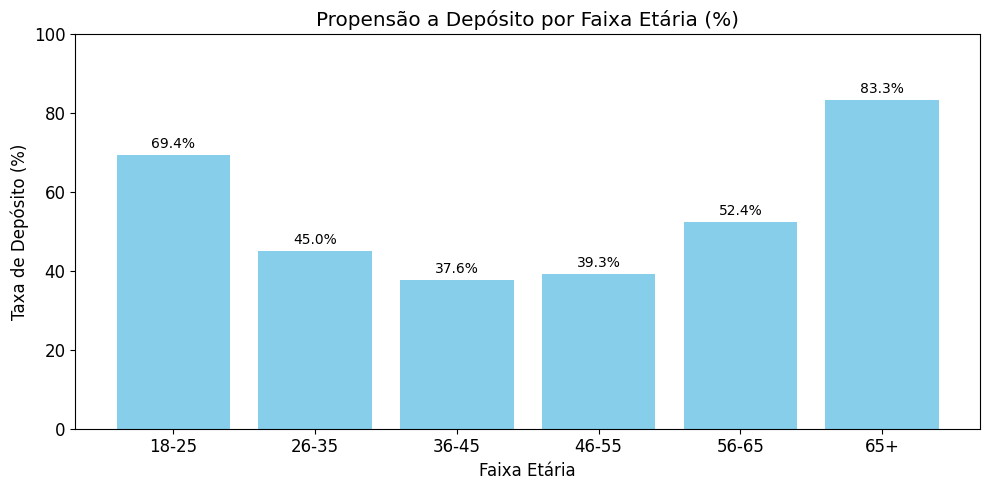

In [ ]:
# Propensão a depósito dentro de cada faixa etária
age_tbl_prop = (
    df_limpo.groupby('faixa_idade', observed=True, dropna=False)['deposito']
    .mean() * 100   # média de 0/1 = taxa percentual
).round(2)

display(age_tbl_prop)

# --- gráfico de barras para taxa de depósito por faixa ---
plt.figure(figsize=(10,5))
bars = plt.bar(age_tbl_prop.index.astype(str), age_tbl_prop.values, color='skyblue')

# adiciona rótulos acima das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,
             f"{height:.1f}%", ha='center', va='bottom', fontsize=10)

plt.title("Propensão a Depósito por Faixa Etária (%)")
plt.ylabel("Taxa de Depósito (%)")
plt.xlabel("Faixa Etária")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

,total_clientes,total_depositos,%clientes_no_total,%depositos_no_total
faixa_idade,,,,
26-35,3170,1428,37.47,38.04
36-45,2398,902,28.35,24.03
46-55,1576,619,18.63,16.49
56-65,782,410,9.24,10.92
18-25,360,250,4.26,6.66
65+,174,145,2.06,3.86


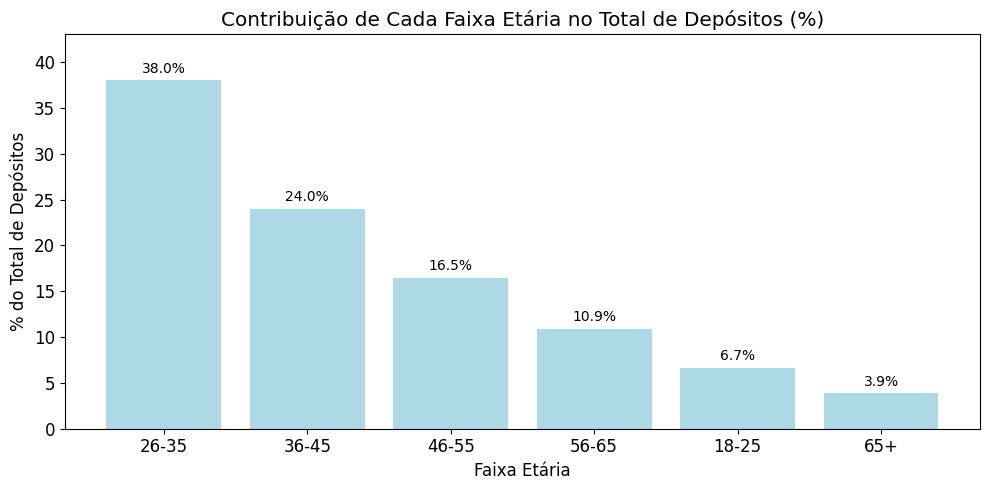

In [ ]:
# total de clientes da base
total_clientes = len(df_limpo)
total_depositos = df_limpo['deposito'].sum()

# tabela: total clientes, total depósitos e % no todo
age_tbl_total = (
    df_limpo.groupby('faixa_idade', observed=True, dropna=False)['deposito']
    .agg(total_clientes='count', total_depositos='sum')
)

# % de clientes da faixa no total da base
age_tbl_total['%clientes_no_total'] = (age_tbl_total['total_clientes'] / total_clientes * 100).round(2)

# % de depósitos daquela faixa no total de depósitos da base
age_tbl_total['%depositos_no_total'] = (age_tbl_total['total_depositos'] / total_depositos * 100).round(2)

# ordena pela contribuição de depósitos
age_tbl_total = age_tbl_total.sort_values('%depositos_no_total', ascending=False)

display(age_tbl_total)

# --- gráfico de barras para % de depósitos no total ---
plt.figure(figsize=(10,5))
bars = plt.bar(age_tbl_total.index.astype(str), age_tbl_total['%depositos_no_total'], color='lightblue')

# adiciona rótulo de valor acima da barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f"{height:.1f}%", ha='center', va='bottom', fontsize=10)

plt.title("Contribuição de Cada Faixa Etária no Total de Depósitos (%)")
plt.ylabel("% do Total de Depósitos")
plt.xlabel("Faixa Etária")
plt.ylim(0, age_tbl_total['%depositos_no_total'].max() + 5)
plt.tight_layout()
plt.show()


**Interpretação:**  

A análise foi feita sob duas óticas diferentes:

1. Propensão (probabilidade individual de depósito)


*   Quando analisamos a proporção de clientes que realizaram depósitos dentro de cada faixa etária, observamos que as faixas 18–25 anos (≈69%) e 65+ anos (≈83%) foram as mais propensas a aderir.
*   Isso indica que, embora sejam grupos menores em número absoluto, os indivíduos dessas faixas apresentaram uma probabilidade significativamente maior de realizar o depósito em comparação às demais faixas.

2. Volume (contribuição total para os depósitos da campanha)


*   Ao observar a contribuição absoluta de cada faixa no total de depósitos da campanha, destacam-se os grupos 26–35 anos (≈38% do total de depósitos) e 36–45 anos (≈24% do total de depósitos).
*   Essa predominância ocorre porque essas faixas concentram a maior quantidade de clientes, mesmo que sua taxa interna de adesão seja relativamente mais baixa (entre 37% e 45%).

3. Conclusão


*   Com o objetivo principal de identificar quem possui mais chance de aderir à campanha, as faixas entre 18-25 anos e 65+ são as mais relevantes;
*   Caso o objetivo principal for de identificar quem impulsiona mais o resultado total da campanha, serão os adultos entre a faixa de 26-45 anos, pelo maior volume de dados.


In [ ]:

perfil = df_limpo[df_limpo['deposito']==1].groupby('faixa_idade', observed=True)[['saldo','inadimplente','financiamento_imobiliario','emprestimo_pessoal' ]].mean()
perfil

,saldo,inadimplente,financiamento_imobiliario,emprestimo_pessoal
faixa_idade,,,,
18-25,764.488000,0.008000,0.232000,0.080000
26-35,858.902661,0.011905,0.417367,0.098039
36-45,922.797118,0.021064,0.473392,0.086475
46-55,1027.819063,0.008078,0.313409,0.124394
56-65,1160.665854,0.000000,0.200000,0.073171
65+,1338.255172,0.006897,0.027586,0.013793



**Interpretação:**  
**18–25 anos**: idade que possui o menor saldo médio (≈764) e com baixa inadimplência (0,8%). Poucos possuem empréstimos (8%), mas 23% apresentam algum financiamento imobiliário, o que acarreta em um comprometimento do saldo pessoal. Eles são pouco relevantes quando comparados ao volume total da faixa, mas são propensos a aderir à campanha (≈69%).

**26–35 anos**: possuem um saldo médio pouco maior que a média geral (≈859 - média geral ≈792) e com um aumento na inadimplência (1,2%). É uma das faixas que mais concentra os financiamentos imobiliários (41%) e que apresenta alta incidência de empréstimos pessoais (≈10%). Representam o maior volume absoluto de depósitos, pela alta concentração de clientes (≈38% do total).

**36–45 anos**: um saldo médio em crescimento (≈923), mas com a inadimplência mais alta que a faixa anterior (2,1%). Quase metade desses clientes (47%) possui algum financiamento imobiliário, o que representa um forte comprometimento financeiro. Eles contribuem muito em volume de depósitos, mas com uma propensão individual menor (≈38%).

**46–55 anos**: faixa que apresenta um saldo mais elevado (≈1.028), com a taxa de inadimplência caindo (0,8%) e com menor dependência de financiamentos (31%). Porém os empréstimos pessoais ainda são um destaque (12,4%), mostrando ainda assim um certo comprometimento financeiro. Perfil de consolidação patrimonial, mais conservador na adesão à campanha (≈40%).

**56–65 anos**: possuem altos saldos médios (≈1.160), uma queda de inadimplência (0%) e também uma queda financiamentos imobiliários, sendo apenas 20% dos clientes comprometidos. São clientes de baixo risco e potencial de liquidez, com propensão moderada a depósitos (≈52%).

**65+ anos**: é a faixa etária que possui o maior saldo médio (≈1.338), com uma inadimplência quase inexistente (0,7%), e com pouquíssimos financiamentos ou empréstimos. Apesar do baixo volume de clientes (2% da base), apresentam a maior propensão individual à adesão (≈83%).


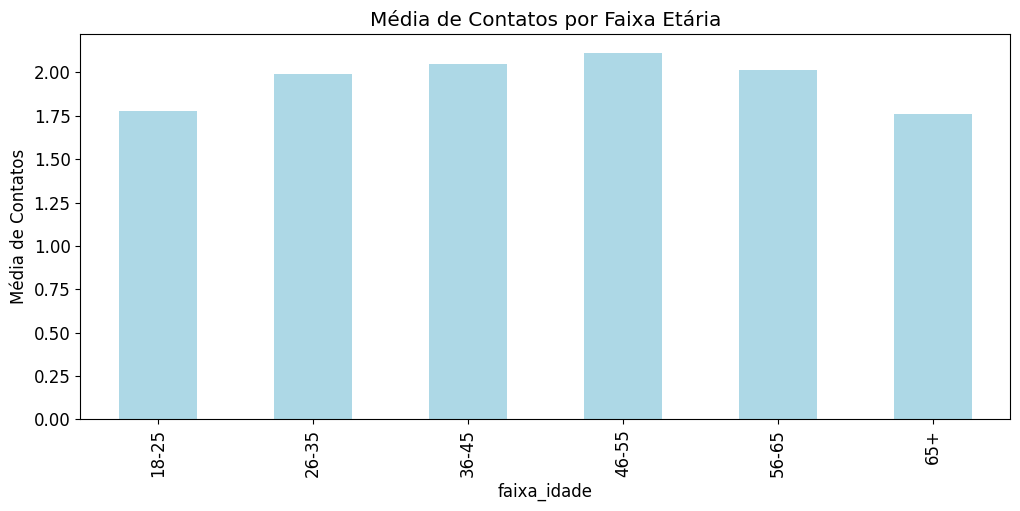

,campanha
faixa_idade,
18-25,1.780556
26-35,1.992114
36-45,2.051710
46-55,2.114213
56-65,2.012788
65+,1.758621


In [ ]:

contatos_idade = df_limpo.groupby('faixa_idade', observed=True, dropna=False)['campanha'].mean()

plt.figure()
contatos_idade.plot(kind='bar', color='lightblue')
plt.title("Média de Contatos por Faixa Etária")
plt.ylabel("Média de Contatos")
plt.show()

contatos_idade


,campanha_media,duracao_media_s,taxa_deposito,n,duracao_media_min,taxa_deposito_%
faixa_idade,,,,,,
18-25,1.780556,324.791667,0.694444,360,5.413194,69.44
26-35,1.992114,316.774448,0.450473,3170,5.279574,45.05
36-45,2.051710,306.865304,0.376147,2398,5.114422,37.61
46-55,2.114213,305.177030,0.392766,1576,5.086284,39.28
56-65,2.012788,318.147059,0.524297,782,5.302451,52.43
65+,1.758621,355.649425,0.833333,174,5.927490,83.33


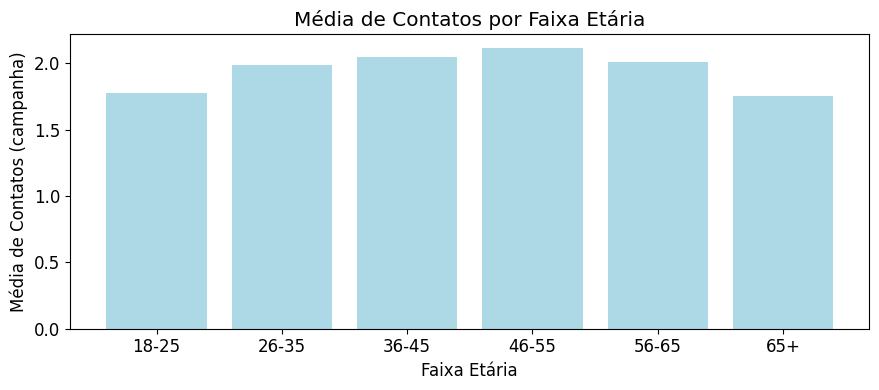

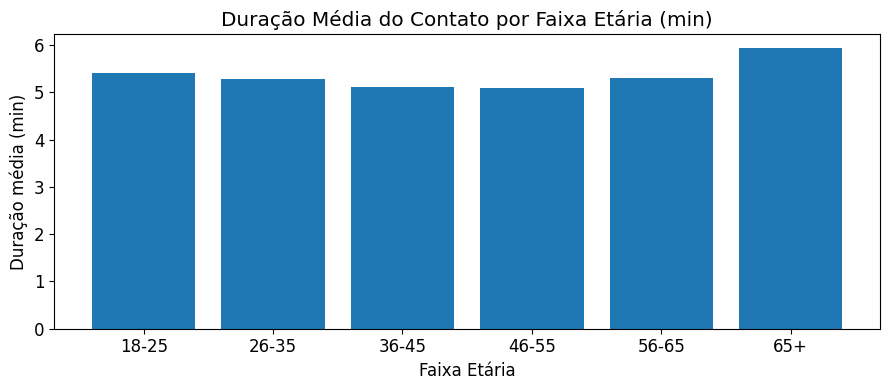

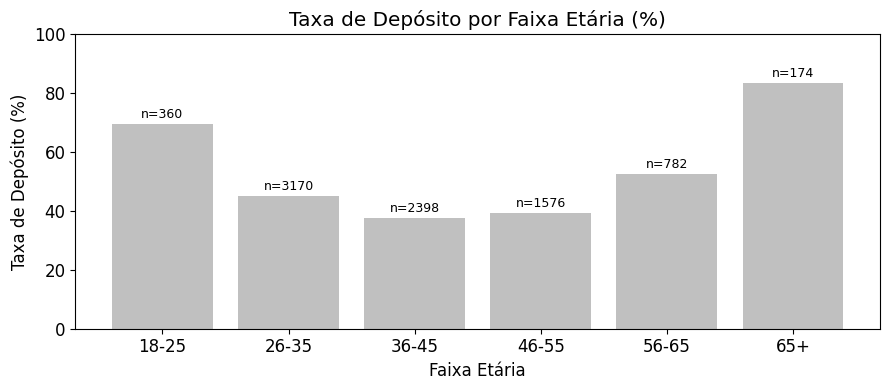

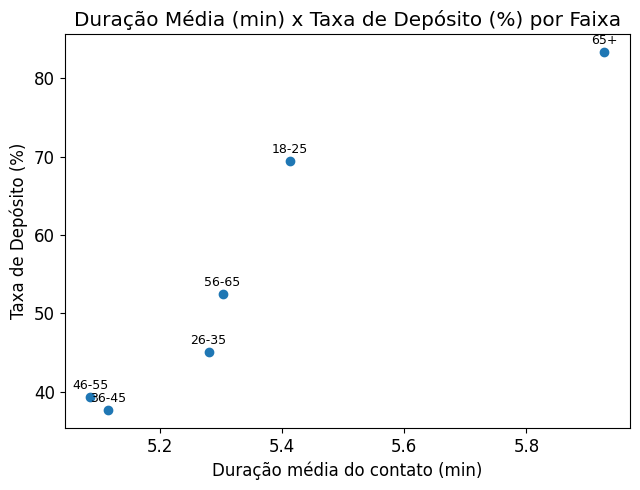

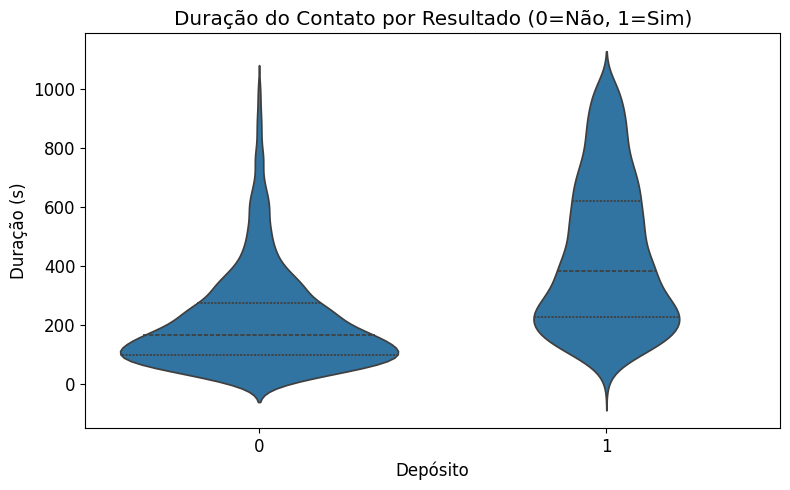

Correlação Pearson (duração vs depósito): 0.472


In [ ]:
# 1) Agregações por faixa etária: contatos, duração e taxa de depósito
age_metrics = (
    df_limpo.groupby('faixa_idade', observed=True, dropna=False)
    .agg(
        campanha_media=('campanha','mean'),
        duracao_media_s=('duracao_contato','mean'),
        taxa_deposito=('deposito','mean'),
        n=('deposito','size')
    )
)

# converter a duração média para minutos (fica mais intuitivo)
age_metrics['duracao_media_min'] = age_metrics['duracao_media_s'] / 60.0
age_metrics['taxa_deposito_%'] = (age_metrics['taxa_deposito']*100).round(2)

display(age_metrics)

# 2) Gráficos comparativos por faixa etária
import matplotlib.pyplot as plt

# 2a) Média de contatos por faixa
plt.figure(figsize=(9,4))
plt.bar(age_metrics.index.astype(str), age_metrics['campanha_media'], color='lightblue')
plt.title("Média de Contatos por Faixa Etária")
plt.ylabel("Média de Contatos (campanha)")
plt.xlabel("Faixa Etária")
plt.tight_layout()
plt.show()

# 2b) Duração média do contato por faixa (em minutos)
plt.figure(figsize=(9,4))
plt.bar(age_metrics.index.astype(str), age_metrics['duracao_media_min'])
plt.title("Duração Média do Contato por Faixa Etária (min)")
plt.ylabel("Duração média (min)")
plt.xlabel("Faixa Etária")
plt.tight_layout()
plt.show()

# 2c) Taxa de depósito por faixa (para comparar com os dois gráficos acima)
plt.figure(figsize=(9,4))
bars = plt.bar(age_metrics.index.astype(str), age_metrics['taxa_deposito_%'], color='silver')
for b,v in zip(bars, age_metrics['n']):
    plt.text(b.get_x()+b.get_width()/2, b.get_height()+1, f"n={v}", ha='center', va='bottom', fontsize=9)
plt.title("Taxa de Depósito por Faixa Etária (%)")
plt.ylabel("Taxa de Depósito (%)")
plt.xlabel("Faixa Etária")
plt.ylim(0, max(100, age_metrics['taxa_deposito_%'].max()+5))
plt.tight_layout()
plt.show()

# 3) Relação direta: duração média da faixa vs taxa de depósito da faixa
plt.figure(figsize=(6.5,5))
plt.scatter(age_metrics['duracao_media_min'], age_metrics['taxa_deposito_%'])
for label, (x, y) in zip(age_metrics.index.astype(str),
                          zip(age_metrics['duracao_media_min'], age_metrics['taxa_deposito_%'])):
    plt.text(x, y+1, label, ha='center', fontsize=9)
plt.title("Duração Média (min) x Taxa de Depósito (%) por Faixa")
plt.xlabel("Duração média do contato (min)")
plt.ylabel("Taxa de Depósito (%)")
plt.tight_layout()
plt.show()


# 5) Distribuição de duração por resultado (0/1)
plt.figure(figsize=(8,5))
sns.violinplot(data=df_limpo, x='deposito', y='duracao_contato', inner='quartile')
plt.title("Duração do Contato por Resultado (0=Não, 1=Sim)")
plt.xlabel("Depósito"); plt.ylabel("Duração (s)")
plt.tight_layout()
plt.show()

# (opcional) correlação simples
corr = df_limpo[['duracao_contato','deposito']].corr().iloc[0,1]
print(f"Correlação Pearson (duração vs depósito): {corr:.3f}")



**Interpretação:**  
**18–25 anos**: recebem em média 1,78 contatos e têm duração média de 5,41 minutos. Apesar de pouco abordados, apresentam uma alta propensão individual ao depósito (≈69%), o que sugere que menos contatos, mas relativamente longos, são suficientes para convencê-los.

**26–35 anos**: média de 1,99 contatos, com duração de 5,28 min. São a faixa etária mais numerosa e contribuem com o maior volume absoluto de depósitos (≈38%). Porém, sua taxa individual de adesão (≈45%) é menor que a dos jovens e idosos, indicando que precisam de maior insistência.

**36–45 anos**: recebem em média 2,05 contatos de 5,11 min cada. É a faixa que apresenta maior exigência em contatos e ainda assim possui taxa baixa de adesão (≈38%). Mostra resistência e provável necessidade de estratégias mais personalizadas.

**46–55 anos**: possuem a maior média de contatos (2,11), com 5,09 min de duração. Apesar do esforço de abordagem, sua adesão também é baixa (≈39%), confirmando o perfil mais conservador dessa faixa etária.

**56–65 anos**: recebem 2 contatos em média, com duração de 5,30 min. Têm propensão intermediária (≈52%), com resultados melhores que os de meia-idade, mesmo com esforço semelhante de campanha.

**65+ anos**: são os que recebem menos contatos (1,75), mas com a maior duração média (≈5,93 min). Apesar do baixo volume de clientes (≈2% da base), apresentam a maior propensão individual ao depósito (≈83%), reforçando que o contato de qualidade pesa mais que a quantidade.

Portanto, a idade acaba influenciando tanto na quantidade de contatos obtidos quanto na duração desses contatos, o que resulta na efetividade da campanha.


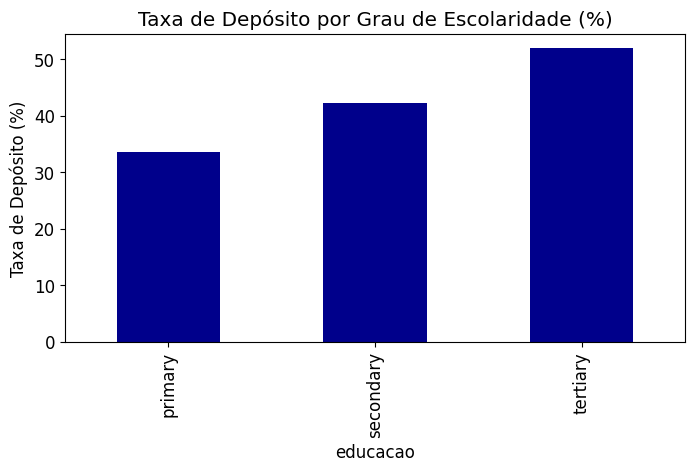

,deposito
educacao,
primary,33.602875
secondary,42.146715
tertiary,51.911815


In [ ]:
edu_dep = (
    df_limpo.groupby('educacao', observed=True, dropna=False)['deposito']
    .mean() * 100
)

plt.figure(figsize=(8,4))
edu_dep.plot(kind='bar', color='darkblue')
plt.title("Taxa de Depósito por Grau de Escolaridade (%)")
plt.ylabel("Taxa de Depósito (%)")
plt.show()

edu_dep


In [ ]:
edu_perfil = (
    df_limpo[df_limpo['deposito']==1]['educacao']
    .value_counts(normalize=True) * 100
)

print("Distribuição de escolaridade entre os que depositaram:\n")
print(edu_perfil)


Distribuição de escolaridade entre os que depositaram:

educacao
secondary    49.893447
tertiary     40.143847
primary       9.962706
Name: proportion, dtype: float64


**Interpretação:**

Os clientes com uma educação primária possuem a menor taxa de adesão à campanha realisada, sendo apenas 33,6% que realizaram os depósitos. Os clientes com educação secundária apresentam um nível intermediário de adesão, tendo 42,16% que fizeram o depósito. Já os que possuem uma educação terciária apresentam um nível maior de adesão, com 51,91% de clientes que aderiram a campanha. Isso demonstra que há uma correlação positiva entre o nível de escolaridade dos clientes com a propensão de realizarem os depósitos.

Fazendo uma relação entre apenas aqueles que realizaram o depósito, percebe-se que apesar de terem um nível intermediário de adesão, os clientes com educação secundária são os que mais realizaram o depósito (49,9%), seguido com uma diferença de apenas 9,8% pelos com educação terciária (40,1%). Os clientes que possuem apenas a educação primária representam apenas 10% daqueles que realizam o depósito.

## 4. Educação × Inadimplência / Empréstimo / Financiamento

***Dúvidas quanto ao grau de educação com a quantidade de dívidas dos clientes:***

- Qual grau de escolaridade concentra mais dívidas (inadimplência, financiamentos e empréstimos pessoais)?

- Existe relação entre escolaridade e o saldo médio dos clientes?

- Existe relação entre escolaridade e a quantidade de contatos recebidos na campanha?

4.1 Dívidas por escolaridade

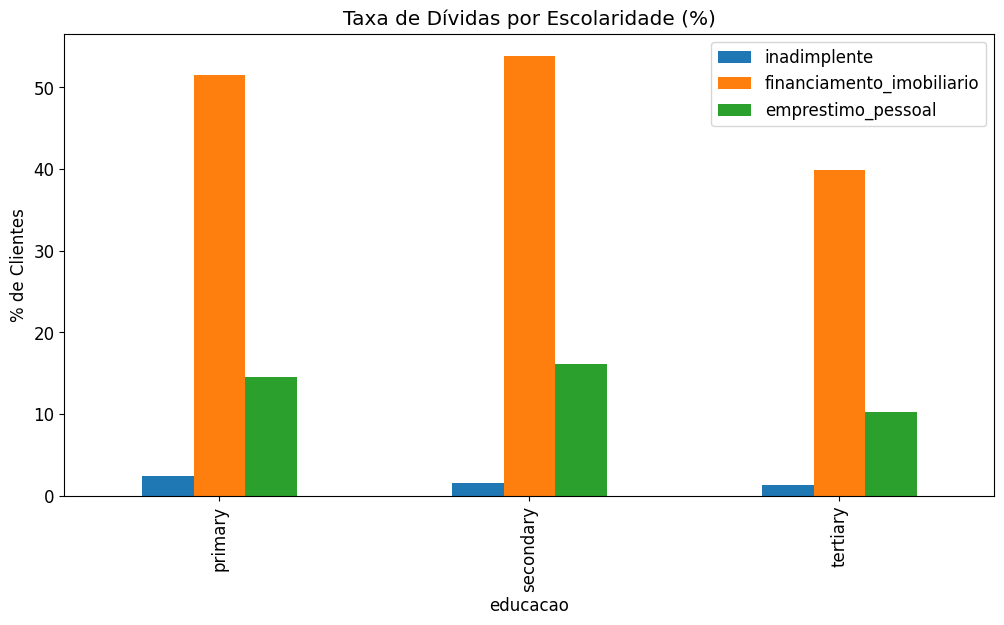

,inadimplente,financiamento_imobiliario,emprestimo_pessoal
educacao,,,
primary,2.425876,51.572327,14.555256
secondary,1.597660,53.892889,16.134113
tertiary,1.343438,39.924216,10.265243


In [ ]:
edu_dividas = df_limpo.groupby('educacao')[['inadimplente','financiamento_imobiliario','emprestimo_pessoal']].mean()*100
edu_dividas.plot(kind='bar', figsize=(12,6))
plt.title("Taxa de Dívidas por Escolaridade (%)")
plt.ylabel("% de Clientes")
plt.show()
display(edu_dividas)


**Interpretação:**  

**Primária**: maior inadimplência (2,4%) e alta incidência de financiamentos (51,5%) e empréstimos pessoais (14,6%). O grupo que possui educação primária mostra uma vulnerabilidade financeira, com dependência de crédito.

**Secundária**: inadimplência intermediária (1,6%), mas com o maior nível de financiamento imobiliário (≈54%) e também a maior taxa de empréstimos pessoais (16,1%). Portanto o grupo com a educação secundária é o mais exposto ao endividamento.

**Terciária**: menor inadimplência (1,3%) e menor dependência de crédito (≈40% têm financiamento, 10% empréstimo). Perfil mais equilibrado e financeiramente estável.


4.2 Saldo médio por escolaridade

In [ ]:
saldo_edu = df_limpo.groupby('educacao')['saldo'].mean().sort_values()
print("\nSaldo médio por escolaridade:")
display(saldo_edu)


Saldo médio por escolaridade:


,saldo
educacao,
secondary,743.429118
primary,745.902965
tertiary,884.909404



**Interpretação:**  

- Primário e Secundário apresentam saldos médios semelhantes, com algo em torno de ≈744.
- Já o Terciário destaca com um saldo maior, em torno de ≈885, o que reforça o perfil mais equilibrado com menor vulnerabilidade.


4.3 Contatos médios por escolaridade

In [ ]:
# Distribuição de clientes por faixa etária e escolaridade
faixa_edu = (
    df_limpo.groupby(['faixa_idade', 'educacao'], observed=True, dropna=False)
    .size()
    .unstack(fill_value=0)
)

print("Quantidade de clientes por faixa etária e escolaridade:\n")
display(faixa_edu)


Quantidade de clientes por faixa etária e escolaridade:



educacao,primary,secondary,tertiary
faixa_idade,,,
18-25,29,245,86
26-35,193,1687,1290
36-45,324,1274,800
46-55,306,809,461
56-65,190,368,224
65+,71,61,42


In [ ]:
campanha_edu = df_limpo.groupby('educacao')['campanha'].mean().sort_values()
print("\nContatos médios por escolaridade:")
display(campanha_edu)


Contatos médios por escolaridade:


,campanha
educacao,
secondary,1.964671
tertiary,2.056838
primary,2.143756



**Interpretação:**  
Pelos dados obtidos, concluí-se que:
- Os clientes com escolaridade primária precisam de mais contatos, média de aproximadamente ≈2,14, para serem convencidos.
- Os clientes com escolaridade secundária demandam menor esforço, com uma média de ≈1,9 contatos, mas que pode estar ligado à uma maior exposição ao crédito e necessidade de liquidez.
- Os clientes com escolaridade terciária mesmo obtendo o maior saldo e menor endividamento, necessitam em média de ≈2,05 contatos, o que sugere que possuem um perfil mais exigente para aderir à campanhas.


## 5. Trabalho × Depósito



- Qual a quantidade de pessoas e a idade média para cada tipo de trabalho (admin., technician, services etc.)?

- Qual tipo de trabalho mais realizou depósitos?

- O tipo de trabalho influencia na quantidade de contatos que a pessoa recebeu?

5.1 Estatísticas por trabalho

In [ ]:
trab_stats = df_limpo.groupby('trabalho').agg(
    qtd=('deposito','count'),
    idade_media=('idade','mean'),
    taxa_deposito=('deposito','mean')
).sort_values('taxa_deposito', ascending=False)

print("Quantidade, idade média e taxa de depósito por tipo de trabalho:")
display(trab_stats)


Quantidade, idade média e taxa de depósito por tipo de trabalho:


,qtd,idade_media,taxa_deposito
trabalho,,,
student,248,25.935484,0.774194
retired,473,61.881607,0.634249
unemployed,295,40.976271,0.555932
management,1944,39.641975,0.478395
admin.,1082,38.721811,0.447320
technician,1407,38.771144,0.445629
self-employed,300,38.900000,0.430000
services,726,37.588154,0.369146
housemaid,207,46.603865,0.362319



**Interpretação:**  
*Maior propensão ao depósito:*
- Students (77%) são o grupo mais propenso, embora representem apenas 248 clientes (menor volume relativo).
- Retired (63%) também apresentam alta taxa de adesão, possivelmente por terem mais estabilidade financeira e tempo para avaliar as propostas.
- Unemployed (56%) surpreendem com boa taxa, talvez pela necessidade de liquidez ou alternativas financeiras.

*Menor propensão ao depósito:*
- Blue-collar (33%), entrepreneurs (32%) e housemaids (36%) são os grupos menos propensos, podendo refletir maior instabilidade financeira ou perfis que são menos inclinados a investir.

*Grupos intermediários:*
- Management (48%), admin (45%) e technician (45%) apresentam taxas médias de adesão, mas com alto volume de clientes, o que garante relevância em termos absolutos de depósitos.


5.2 Contatos médios por tipo de trabalho

In [ ]:
campanha_trab = df_limpo.groupby('trabalho')['campanha'].mean().sort_values()
print("\nMédia de contatos por tipo de trabalho:")
display(campanha_trab)


Média de contatos por tipo de trabalho:


,campanha
trabalho,
admin.,1.862292
retired,1.900634
unemployed,1.918644
student,1.939516
services,1.980716
self-employed,1.986667
blue-collar,2.017693
technician,2.062544
management,2.116770



**Interpretação:**  
*Profissões com menor esforço de contato:*
- Admin (1,86) e retired (1,90) foram os mais rápidos em decidir, necessitando de menos interações.

*Profissões que exigem mais insistência:*
- Entrepreneurs (2,18), housemaids (2,15) e management (2,11) foram os que precisaram de mais contatos médios.

Isso sugere maior resistência inicial ou necessidade de maior convencimento por parte da campanha.

## 6. Estado Civil × Depósito

- Qual estado civil apresentou maior adesão à campanha (depósitos)?
- Existe relação entre estado civil e ter financiamento, empréstimo ou inadimplência?
- Existe relação entre estado civil e o saldo médio?
- Qual é a distribuição de quantidade de clientes e faixa etária em cada estado civil?

6.1 Taxa de depósito por Estado Civil

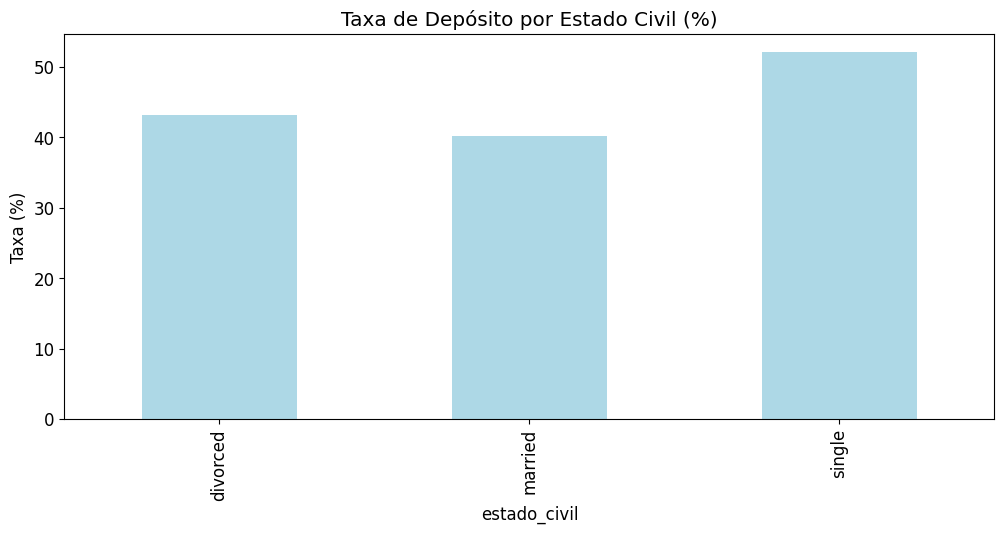

,deposito
estado_civil,
divorced,43.149284
married,40.164453
single,52.099306


In [ ]:
est_civil_dep = df_limpo.groupby('estado_civil')['deposito'].mean()*100
plt.figure()
est_civil_dep.plot(kind='bar', color='lightblue')
plt.title("Taxa de Depósito por Estado Civil (%)")
plt.ylabel("Taxa (%)")
plt.show()
display(est_civil_dep)



**Interpretação:**  
- Solteiros (≈52%) → grupo mais propenso individualmente a aderir à campanha. Provavelmente influenciados por menor comprometimento familiar e maior flexibilidade financeira.
- Divorciados (≈43%) → apresentam propensão intermediária, mas ainda superior à dos casados.
- Casados (≈40%) → têm a menor taxa de adesão, apesar de representarem o maior volume de clientes na base.


6.2 Dívidas e saldo médio por Estado Civil

In [ ]:
est_civil_dividas = df_limpo.groupby('estado_civil')[['inadimplente','financiamento_imobiliario','emprestimo_pessoal','saldo']].mean()
print("\nMédias de dívidas e saldo por estado civil:")
display(est_civil_dividas)


Médias de dívidas e saldo por estado civil:


,inadimplente,financiamento_imobiliario,emprestimo_pessoal,saldo
estado_civil,,,,
divorced,0.020450,0.494888,0.166667,706.540900
married,0.015602,0.505376,0.152857,817.323424
single,0.015699,0.455276,0.105513,779.598028



**Interpretação:**  
- Casados: concentram o maior saldo médio (≈817), mas também a maior taxa de financiamento imobiliário (≈50,5%), indicando foco em patrimônio e compromissos de longo prazo.
- Solteiros: saldo intermediário (≈780), com menor dependência de crédito (empréstimos ≈10,5%). Perfil de risco baixo e liquidez moderada.
- Divorciados: menor saldo médio (≈706) e maior taxa de empréstimos pessoais (≈16,7%), sugerindo maior fragilidade financeira e uso de crédito de curto prazo.  


6.3 Distribuição de quantidade de clientes e faixa etária

In [ ]:
est_civil_dist = df_limpo.groupby(['estado_civil','faixa_idade'], observed=True, dropna=False).size().unstack(fill_value=0)
print("\nDistribuição de clientes por estado civil e faixa etária:")
display(est_civil_dist)


Distribuição de clientes por estado civil e faixa etária:


faixa_idade,18-25,26-35,36-45,46-55,56-65,65+
estado_civil,,,,,,
divorced,2,156,340,298,149,33
married,34,1317,1534,1127,595,136
single,324,1697,524,151,38,5


**Interpretação:**
- Solteiros: predominam entre 18–35 anos, grupo jovem com maior propensão ao depósito.
- Casados: maioria absoluta entre 36–65 anos, faixa etária que concentra estabilidade financeira, mas com perfil mais conservador na adesão.
- Divorciados: mais presentes entre 36–55 anos, onde também se observa maior endividamento relativo e saldos mais baixos.

## 7. Campanha e Duração × Depósito

- O número de contatos (campanha) aumentou a probabilidade de depósito ou saturou o cliente?
- Existe relação entre o número de contatos e a duração da chamada?
- Quanto maior a duração do contato, maior a chance de depósito?

7.1 Taxa de depósito por número de contatos

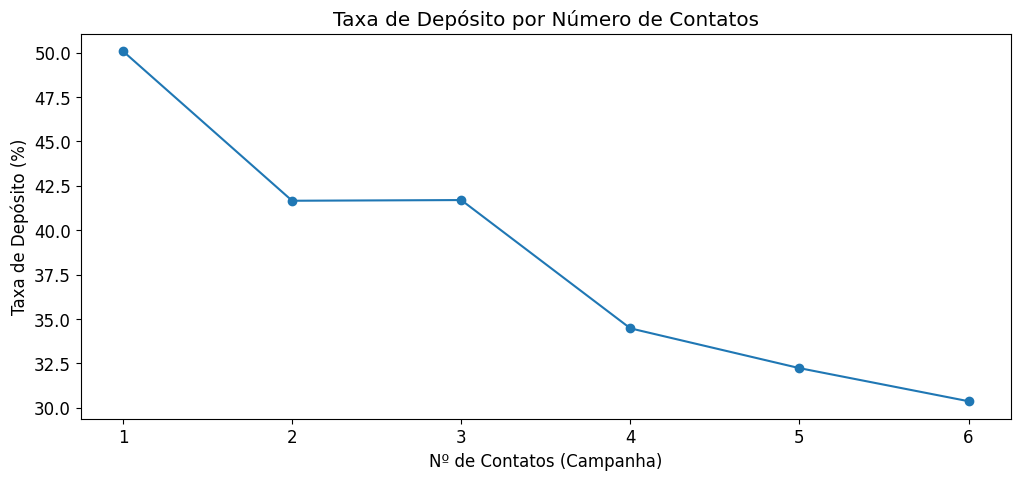

,deposito
campanha,
1,50.077479
2,41.659751
3,41.698473
4,34.477124
5,32.236842
6,30.373832


In [ ]:
campanha_dep = df_limpo.groupby('campanha')['deposito'].mean()*100
plt.figure()
campanha_dep.plot(marker='o')
plt.title("Taxa de Depósito por Número de Contatos")
plt.ylabel("Taxa de Depósito (%)")
plt.xlabel("Nº de Contatos (Campanha)")
plt.show()
display(campanha_dep)



**Interpretação:**  
- Clientes contatados apenas 1 vez tiveram a maior taxa de adesão (≈50%).
- A partir do 2º contato, a taxa cai para ≈41%, mantendo-se estável até o 3º.
- Depois do 4º contato em diante, a adesão cai ainda mais, chegando a ≈30% com 6 contatos.

Portanto, o excesso de ligação causa o efeito oposto, ou seja, desgasta e cansa o cliente, o que faz com que ele não realize o depósito.

7.2 Relação Duração x Depósito

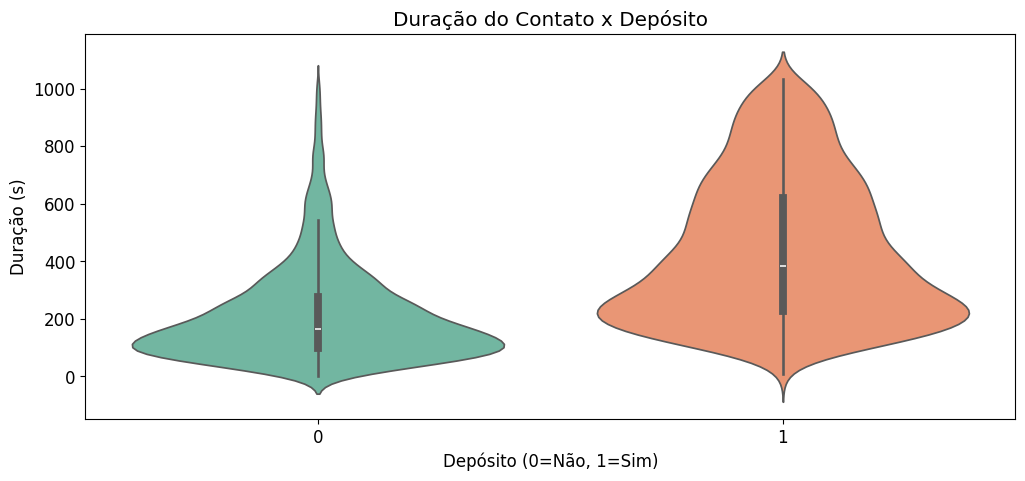

In [ ]:
plt.figure()
sns.violinplot(
    x='deposito',
    y='duracao_contato',
    data=df_limpo,
    hue='deposito',       # define a cor pelo próprio x
    palette="Set2",
    legend=False          # remove a legenda repetida
)
plt.title("Duração do Contato x Depósito")
plt.ylabel("Duração (s)")
plt.xlabel("Depósito (0=Não, 1=Sim)")
plt.show()



**Interpretação:**  
- O violinplot mostra que, em média, os clientes que depositaram (1) tiveram duração de chamadas bem mais longas (mediana entre 300–400 segundos, ou 5–7 minutos).
- Já os que não depositaram (0) tendem a ter chamadas mais curtas (mediana abaixo de 200 segundos).
- Também se observa uma maior dispersão nas chamadas bem-sucedidas, o que indica que alguns clientes demandam tempo adicional para decidir.

Portanto, poucos contatos com uma duração maior podem aumentar a chance da adesão do cliente com a campanha ofertada.


## 8. Outras Análises


- Meses mais efetivos da campanha: em quais meses houve maior taxa de adesão?

- Saldo médio de inadimplentes × não inadimplentes.

- Correlação geral entre variáveis numéricas (idade, saldo, duração, campanha, etc.) para identificar padrões.

8.1 Taxa de depósito por mês

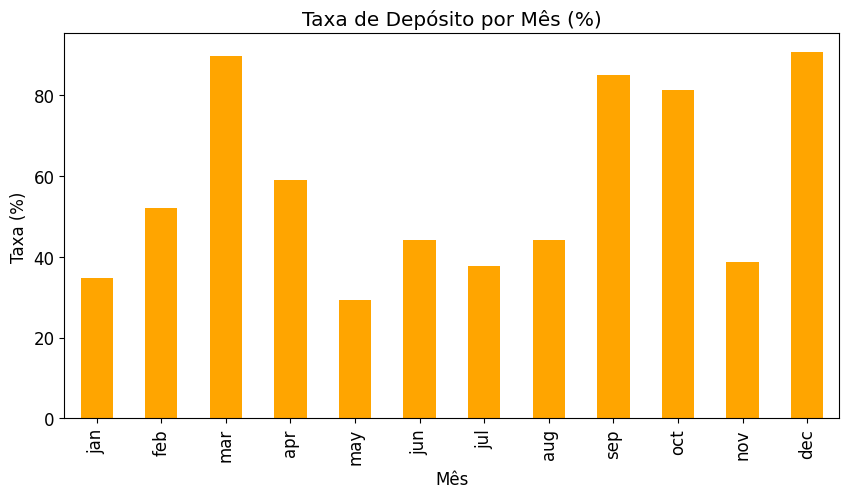

,deposito
mes,
jan,34.798535
feb,51.960784
mar,89.671362
apr,58.995816
may,29.385771
jun,44.196429
jul,37.715322
aug,44.149909
sep,84.913793


In [ ]:
ordem_meses = ["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]

mes_dep = (df_limpo.groupby('mes')['deposito'].mean()*100).reindex(ordem_meses)

plt.figure(figsize=(10,5))
mes_dep.plot(kind='bar', color='orange')
plt.title("Taxa de Depósito por Mês (%)")
plt.ylabel("Taxa (%)")
plt.xlabel("Mês")
plt.show()

display(mes_dep)

**Interpretação:**

- Os meses com maior taxa de adesão foram dezembro (≈91%), março (≈90%), setembro (≈85%) e outubro (≈81%).

- Os menos efetivos foram maio (≈29%) e janeiro (≈35%).

8.2 Saldo médio: inadimplentes x não inadimplentes

In [ ]:
saldo_inad = df_limpo.groupby('inadimplente')['saldo'].mean()
print("\nSaldo médio de inadimplentes (1) vs não inadimplentes (0):")
display(saldo_inad)


Saldo médio de inadimplentes (1) vs não inadimplentes (0):


,saldo
inadimplente,
0,805.932476
1,-35.729927


**Interpretação:**

- Não inadimplentes (0): saldo médio positivo e alto (≈806).
- Inadimplentes (1): saldo médio negativo (≈ –36), mostrando que este grupo consome crédito além do disponível.
- Portanto, a inadimplência é um forte indicador de fragilidade financeira, o que causa um impacto direto no saldo.

8.3 Correlação entre variáveis númericas

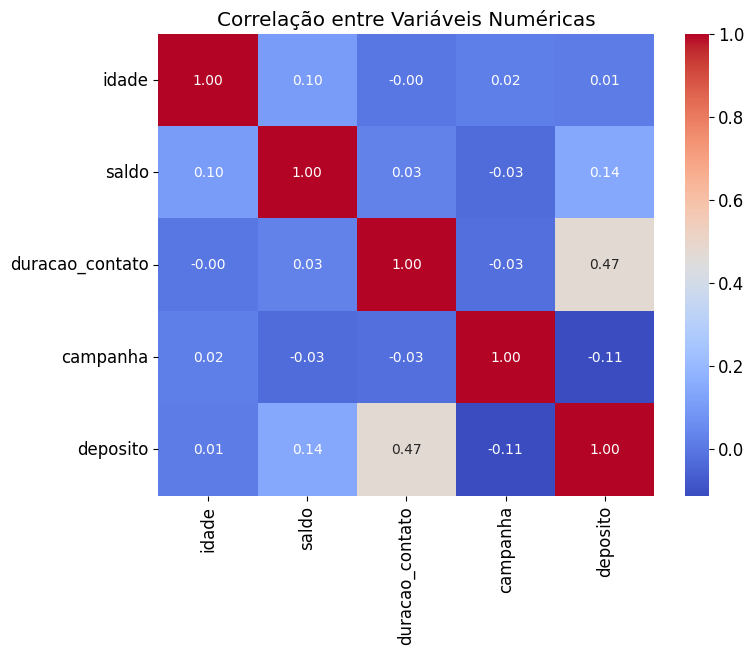

In [ ]:
corr = df_limpo[['idade','saldo','duracao_contato','campanha','deposito']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Variáveis Numéricas")
plt.show()

**Interpretação:**

- Duração do contato x depósito (0.47): a correlação mais forte → quanto mais longa a chamada, maior a chance de depósito.
- Saldo x depósito (0.14): leve correlação positiva → clientes com mais saldo têm maior propensão.
- Campanha x depósito (-0.11): correlação negativa → muitos contatos reduzem a adesão, reforçando a hipótese de saturação.
- Idade: praticamente sem correlação direta (≈0.01), o que confirma que faixa etária isolada não explica a adesão, mas sim seu cruzamento com variáveis financeiras e comportamentais.


# Conclusões  
A análise da base de dados revelou padrões importantes sobre o perfil dos clientes e os fatores que mais influenciam a adesão à campanha de depósitos.
1. Perfil etário
- As faixas 18–25 anos e 65+ apresentaram a maior propensão relativa a depósitos, apesar de representarem uma parcela pequena do total da base.
- Em termos absolutos, as faixas 26–45 anos concentram o maior volume de depósitos, devido ao peso demográfico e ao forte comprometimento financeiro (financiamentos e empréstimos).
- A idade, isoladamente, não apresenta correlação significativa, mas combinada ao saldo e comportamento de endividamento, revela perfis distintos de propensão.

2. Perfil econômico e financeiro
- O saldo médio cresce com a idade, sendo mais alto entre os clientes 56–65 e 65+, grupos também com menor inadimplência e menor dependência de financiamentos.
- Os mais jovens têm saldo mais baixo e dependem mais de financiamentos, mas ainda assim demonstram alta propensão a aderir.
- A inadimplência mostrou-se um divisor forte: inadimplentes têm saldo médio negativo e baixa probabilidade de depósito.

3. Escolaridade
- Clientes com nível superior (tertiary) apresentam maior saldo médio e menor endividamento, confirmando melhor situação financeira.
- Contudo, a maior adesão proporcional ocorreu em clientes com escolaridade primária e secundária, revelando que níveis mais altos de educação não garantem maior propensão de adesão.
- Na base total de depositantes, secondary concentra quase metade dos depósitos (≈50%).

4. Trabalho e estado civil
- Estudantes e aposentados foram os grupos com maior propensão ao depósito, enquanto blue-collar e empreendedores tiveram os menores índices.
- Em relação ao estado civil, solteiros mostraram maior taxa de adesão (≈52%), contrastando com casados (≈40%).
- Os divorciados ficam em posição intermediária, mas com maior incidência de dívidas em relação aos outros grupos.

5. Contatos e duração
- O número de contatos apresenta ponto de saturação: a taxa de adesão cai a partir do 2º contato e segue em queda nos seguintes.
- Já a duração da chamada é fortemente correlacionada com o sucesso da campanha: quanto mais longa, maior a chance de depósito. Isso sugere que a qualidade da interação é mais relevante que a insistência em contatos repetidos.

6. Sazonalidade
- A campanha apresentou resultados significativamente melhores em meses específicos, com destaque para dezembro, março, setembro e outubro, que superaram 80% de adesão em alguns casos.
- Em contrapartida, meses como maio e janeiro tiveram baixa efetividade (<35%).
- Isso demonstra a importância de alinhar o calendário da campanha com momentos estratégicos de maior liquidez e disposição financeira dos clientes.

  
Portanto, a base evidencia que a adesão à campanha não depende de um único fator, mas da interação entre perfil demográfico (idade e estado civil), condição socioeconômica (saldo, inadimplência, dívidas), nível educacional, tipo de trabalho e estratégia de contato.
O maior potencial está em clientes jovens e idosos, em aposentados, estudantes e solteiros, e em períodos de maior sazonalidade positiva.
Já a qualidade do contato (tempo de chamada) se mostra mais determinante do que a quantidade de tentativas.
